In [11]:
import numpy as np
import pandas as pd
import os,sys

In [12]:
path_data = os.path.join(os.getcwd(),os.pardir,os.pardir,'data')

In [13]:
protected_area_data_path = os.path.join(path_data,'protected_area')
# data_list = os.listdir(protected_area_data_path)
protected_area_data_file = os.path.join(protected_area_data_path,'NOAA_Marine_Protected_Areas_Inventory_2023.xlsx')
protected_area_data = pd.read_excel(protected_area_data_file)
protected_area_data = protected_area_data[['Percent Area Marine','Year Established','Longitude','Latitude']]
print(len(protected_area_data))

979


In [14]:
start_year = 2018
year_filtered_protected_area_data = protected_area_data[protected_area_data['Year Established'] < start_year]
print(len(year_filtered_protected_area_data))

# save to csv
filename = 'filtered_protected_area_data_' + str(start_year) + '.csv'
year_filtered_protected_area_data.to_csv(os.path.join(path_data,'protected_area',filename))


976


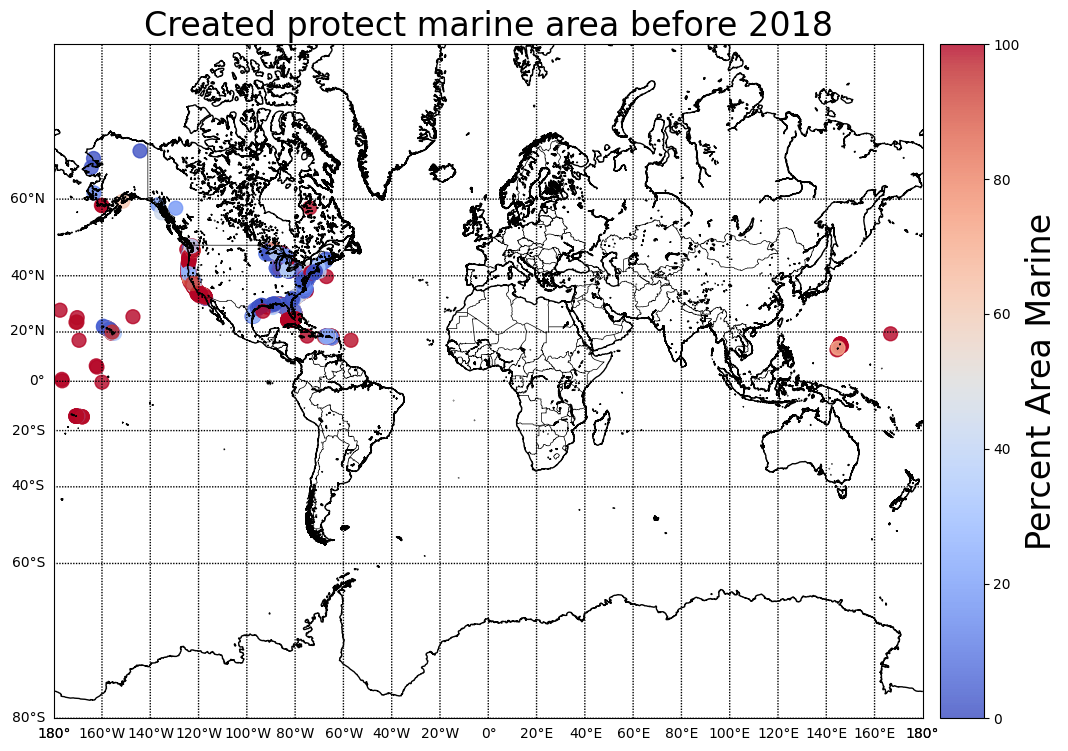

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

lat_min, lat_max = -80, 80
lon_min, lon_max = -180, 180

fontsize = 24
fontsize_title = 28
# Create a figure and axis with a size that you find appropriate
fig, ax = plt.subplots(figsize=(12, 10))

# Create a Basemap instance with a specific map projection, bounding lat/lon, and resolution
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='i', ax=ax)

# Draw coastlines and countries for reference
m.drawcoastlines()
m.drawcountries()

# Convert your latitude and longitude to the map projection coordinates
x, y = m(year_filtered_protected_area_data['Longitude'].values, year_filtered_protected_area_data['Latitude'].values)

# max_area = year_filtered_protected_area_data['Marine Area (km2)'].max()
# normalized_areas = (year_filtered_protected_area_data['Marine Area (km2)'] / max_area) * 100
# scatter_plot = m.scatter(x, y, s=normalized_areas, c=year_filtered_protected_area_data['Marine Area (km2)'], alpha=0.5, cmap='viridis')
# plt.colorbar(scatter_plot, ax=ax, label='Marine Area (km²)')

# Create a colorbar and set its label
scatter = m.scatter(x, y, c=year_filtered_protected_area_data['Percent Area Marine'], cmap='coolwarm', alpha=0.8, s=100)
cb = m.colorbar(scatter, "right", size="5%", pad="2%")
cb.set_label('Percent Area Marine', fontsize=fontsize)

parallels = np.arange(lat_min, lat_max, 20.) # lines of latitude
meridians = np.arange(lon_min, lon_max, 20.) # lines of longitude
m.drawparallels(parallels, labels=[True,False,False,False])
m.drawmeridians(meridians, labels=[False,False,False,True])

# Show the plot
plt.title('Created protect marine area before' + ' ' + str(start_year), fontsize=fontsize)
# save to ./figures/
save_fig_folder = os.path.join(os.getcwd(),os.pardir,'figures')
if not os.path.exists(save_fig_folder):
    os.makedirs(save_fig_folder)
save_fig_path = os.path.join(save_fig_folder,'Protect_marine_area_before_' + str(start_year) + '.png')
plt.savefig(save_fig_path)
plt.show()
